In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
dataset.describe(include=object)

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [9]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

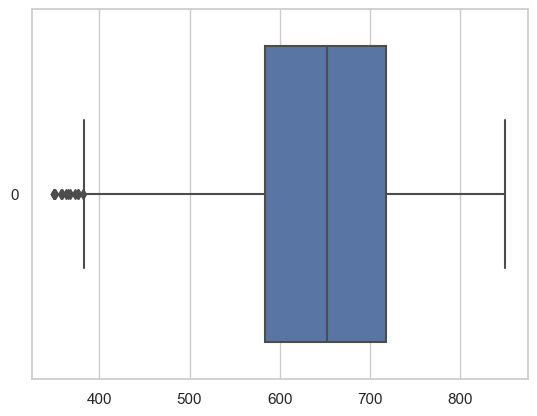

In [ ]:
sns.set(style='whitegrid') 
ax = sns.boxplot(data = dataset['CreditScore'], orient = 'h')

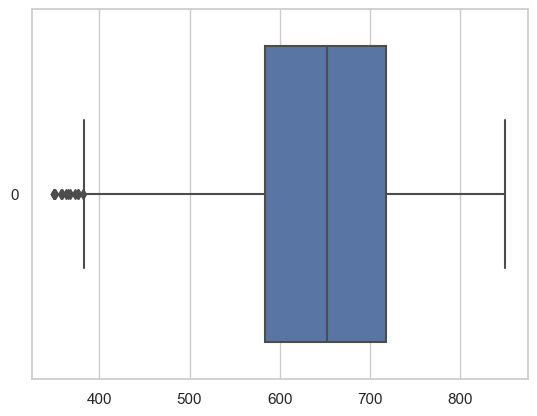

In [12]:
ax = sns.boxplot(data = dataset['CreditScore'], orient = 'h')

In [13]:
Q3 = dataset['CreditScore'].quantile(0.75)
Q1 = dataset['CreditScore'].quantile(0.25)
IQ = Q3 - Q1
S_Min_A = Q1 - 1.5*IQ

In [14]:
dataset[dataset['CreditScore']<S_Min_A].shape[0]

15

In [15]:
IQR = dataset['CreditScore'].quantile(0.75)-dataset['CreditScore'].quantile(0.25)

In [16]:
IQR

134.0

In [17]:
Inf = dataset['CreditScore'].quantile(0.25)-1.5*IQR

In [18]:
Inf

383.0

In [19]:
dataset[dataset['CreditScore']<Inf].count()

RowNumber          15
CustomerId         15
Surname            15
CreditScore        15
Geography          15
Gender             15
Age                15
Tenure             15
Balance            15
NumOfProducts      15
HasCrCard          15
IsActiveMember     15
EstimatedSalary    15
Exited             15
dtype: int64

In [20]:
my_list = ['CreditScore', 'Age']

In [21]:
my_list

['CreditScore', 'Age']

In [22]:
dataset[my_list].head()

,CreditScore,Age
0,619,42
1,608,41
2,502,42
3,699,39
4,850,43


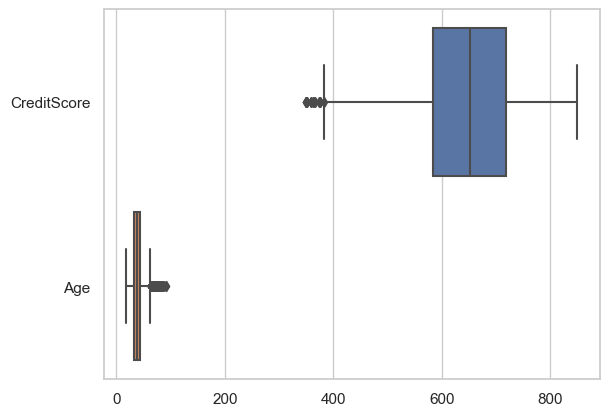

In [23]:
ax = sns.boxplot(data = dataset[my_list], orient = 'h')

In [31]:
#Prep1 : 
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [32]:
type(X) 

pandas.core.frame.DataFrame

In [ ]:
X = X.values
Y = Y.values

In [34]:
type(X)

numpy.ndarray

In [35]:
from sklearn.preprocessing import LabelEncoder #importer labelencoder
labelencoder_X = LabelEncoder() #creation de l'objet
X[:,3] = labelencoder_X.fit_transform(X[:,3]) #la transformation (valeur quali ---> des codes (par ordre alphabe))
X[0:5,:]

array([[619, 'France', 'Female', 24, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 23, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 24, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 21, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 25, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [37]:
#Separer x ET y
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [38]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [39]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [40]:
type(X)

pandas.core.frame.DataFrame

In [41]:
X = X.values
y = y.values

In [42]:
type(X)

numpy.ndarray

In [43]:
X[0:5,:]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder() 

In [ ]:
X[:,1] = label.fit_transform(X[:,1]) 
X[:,2] = label.fit_transform(X[:,2]) 

In [46]:
X[0:10,:]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]], dtype=object)

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [48]:
X.shape

(10000, 10)

In [49]:
ct = ColumnTransformer([('Geography',OneHotEncoder(),[1])],\
                      remainder = 'passthrough') 

In [50]:
X = ct.fit_transform(X)

In [51]:
X.shape

(10000, 12)

In [52]:
X[0:10,:]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [53]:
X = X[:,1:]

In [54]:
X.shape

(10000, 11)

In [55]:
X[0:5,:]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [56]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [57]:
features = ['Geography2','Geography3','CreditScore', 
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [58]:
features

['Geography2',
 'Geography3',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,\
                                                random_state=0)

In [60]:
X_train.shape

(8000, 11)

In [61]:
X_test.shape

(2000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

In [63]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler  # [0,1]

In [65]:
X_train[0,:]

array([0.0, 1.0, 667, 0, 34, 5, 0.0, 2, 1, 0, 163830.64], dtype=object)

In [66]:
X_train_sc[0,:]

array([-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
        0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
        1.10643166])

In [67]:
(667 - X_train[:,2].mean())/(X_train[:,2].std())

0.16958176236487257

In [68]:
scaler.inverse_transform(X_train_sc[0:5,:])

array([[0.0000000e+00, 1.0000000e+00, 6.6700000e+02, 0.0000000e+00,
        3.4000000e+01, 5.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.6383064e+05],
       [1.0000000e+00, 0.0000000e+00, 4.2700000e+02, 1.0000000e+00,
        4.2000000e+01, 1.0000000e+00, 7.5681520e+04, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 5.7098000e+04],
       [0.0000000e+00, 0.0000000e+00, 5.3500000e+02, 0.0000000e+00,
        2.9000000e+01, 2.0000000e+00, 1.1236734e+05, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.8563076e+05],
       [0.0000000e+00, 1.0000000e+00, 6.5400000e+02, 1.0000000e+00,
        4.0000000e+01, 5.0000000e+00, 1.0568363e+05, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.7361709e+05],
       [0.0000000e+00, 1.0000000e+00, 8.5000000e+02, 0.0000000e+00,
        5.7000000e+01, 8.0000000e+00, 1.2677630e+05, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.3229849e+05]])

In [ ]:

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5) 

In [71]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [ ]:

y_pred_knn = knn.predict(X_test_sc)

In [73]:
for i in range(10):
    print(y_test[i], y_pred_knn[i])

0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 0


In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

Accuracy knn 0.827


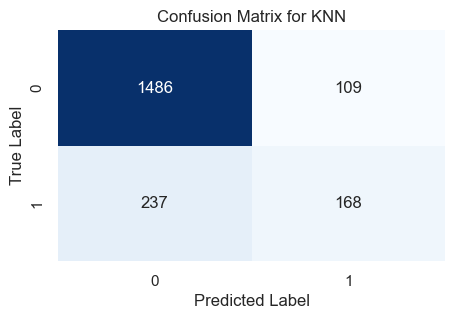

In [83]:
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [88]:
from sklearn.metrics import precision_score, recall_score

In [89]:
print('Recall knn', recall_score(y_test,y_pred_knn))
print('Precision knn', precision_score(y_test,y_pred_knn))

Recall knn 0.4148148148148148
Precision knn 0.6064981949458483


In [ ]:
from sklearn.model_selection import GridSearchCV 
parameters = {'n_neighbors' : [1,3,5,7,9,11,13]} 
model = KNeighborsClassifier() 
clf = GridSearchCV(model,parameters, scoring='accuracy', cv=5)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 9}
0.8303750000000001


In [72]:
y_pred_knn_o = grille.predict(X_test_sc)

In [73]:
print('Confusion matrix knn op \n', confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy knn op', accuracy_score(y_test,y_pred_knn_o))
print('Recall knn op', recall_score(y_test,y_pred_knn_o))
print('Precision knn op', precision_score(y_test,y_pred_knn_o))

Confusion matrix knn op 
 [[1516   79]
 [ 252  153]]
Accuracy knn op 0.8345
Recall knn op 0.37777777777777777
Precision knn op 0.6594827586206896


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 

In [76]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
y_pred_dt = dt.predict(X_test)

In [78]:
for i in range(10):
    print(y_test[i],y_pred_dt[i])

0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1


In [79]:
print('Confusion matrix dt \n', confusion_matrix(y_test,y_pred_dt))
print('Accuracy dt', accuracy_score(y_test,y_pred_dt))
print('Recall dt', recall_score(y_test,y_pred_dt))
print('Precision dt', precision_score(y_test,y_pred_dt))

Confusion matrix dt 
 [[1377  218]
 [ 174  231]]
Accuracy dt 0.804
Recall dt 0.5703703703703704
Precision dt 0.5144766146993318


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500) 

In [83]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [84]:
y_pred_rf = rf.predict(X_test)

In [85]:
print('Confusion matrix rf \n', confusion_matrix(y_test,y_pred_rf))
print('Accuracy rf', accuracy_score(y_test,y_pred_rf))
print('Recall rf', recall_score(y_test,y_pred_rf))
print('Precision rf', precision_score(y_test,y_pred_rf))

Confusion matrix rf 
 [[1524   71]
 [ 193  212]]
Accuracy rf 0.868
Recall rf 0.5234567901234568
Precision rf 0.7491166077738516


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700]
}


rf = RandomForestClassifier()


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_

print(f"Meilleur nombre d'arbres de décision: {best_n_estimators}")
print(f"Score avec ce nombre d'arbres: {best_score}")

In [88]:
importances = rf.feature_importances_

In [ ]:
importances 

array([0.02685643, 0.01392831, 0.14239113, 0.01902659, 0.2371296 ,
       0.08068165, 0.14509636, 0.1301816 , 0.01867162, 0.03834087,
       0.14769585])

In [ ]:
sorted_idx = np.argsort(importances)
sorted_idx

array([ 1,  8,  3,  0,  9,  5,  7,  2,  6, 10,  4], dtype=int64)

In [91]:
features_arr = np.asarray(features)

Text(0.5, 1.0, 'Variable importance')

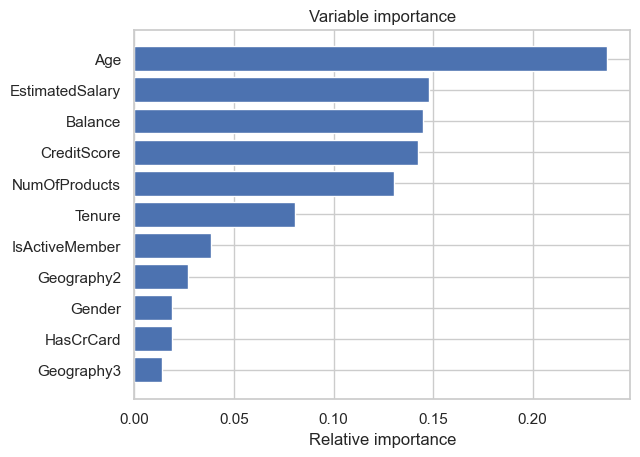

In [ ]:
padding=np.arange(X_train_sc.size/len(X_train_sc))
plt.barh(padding,importances[sorted_idx],align='center')
plt.yticks(padding,features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable importance')

In [ ]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_sc,y_train)

SVC(kernel='linear')

In [99]:
y_predictSVM_l = linear_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_l))
print('Accuracy linear SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_l)))
print('Precision linear SVM {0:.3f}'.format(precision_score(y_test,y_predictSVM_l)))
print('Recall linear SVM {0:.3f}'.format(recall_score(y_test,y_predictSVM_l)))

[[1595    0]
 [ 405    0]]
Accuracy linear SVM 0.797
Precision linear SVM 0.000
Recall linear SVM 0.000


In [ ]:
kernel_SVM = SVC(kernel='rbf')
kernel_SVM.fit(X_train_sc,y_train)

SVC()

In [101]:
y_predictSVM_k = kernel_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_k))
print('Accuracy rbf SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_k)))
print('Precision rbf SVM {0:.3f}'.format(precision_score(y_test,y_predictSVM_k)))
print('Recall rbf SVM {0:.3f}'.format(recall_score(y_test,y_predictSVM_k)))

[[1547   48]
 [ 225  180]]
Accuracy rbf SVM 0.864
Precision rbf SVM 0.789
Recall rbf SVM 0.444


In [ ]:
print(classification_report(y_test,y_predictSVM_k))

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression() 
LR.fit(X_train_sc,y_train) 

LogisticRegression()

In [ ]:
y_predictLR = LR.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictLR))
print('Accuracy Logistic Regression {0:.3f}'.format(accuracy_score(y_test,y_predictLR)))
print('Precision Logistic Regression {0:.3f}'.format(precision_score(y_test,y_predictLR)))
print('Recall Logistic Regression {0:.3f}'.format(recall_score(y_test,y_predictLR)))

[[1526   69]
 [ 309   96]]
Accuracy Logistic Regression 0.811
Precision Logistic Regression 0.582
Recall Logistic Regression 0.237


In [ ]:
model = model.save('rf.h5') 

| Algorithm       | Accuracy     |Recall | Precision |
| :------------- | -----------|-----------|-----------:|
|  Optimized kNN  | 0.834    | 0.377 | 0.659 |
| Decision Tree   | 0.804  | 0.572 | 0.514 |
| Random Forest | 0.865 | 0.523 | 0.736 |
| linear SVM   | 0.797  | 0.000 | 0.000 |
| kernel SVM   | 0.864  | 0.444 | 0.789 |
| Logistic Regression | 0.811 | 0.237 | 0.582 |

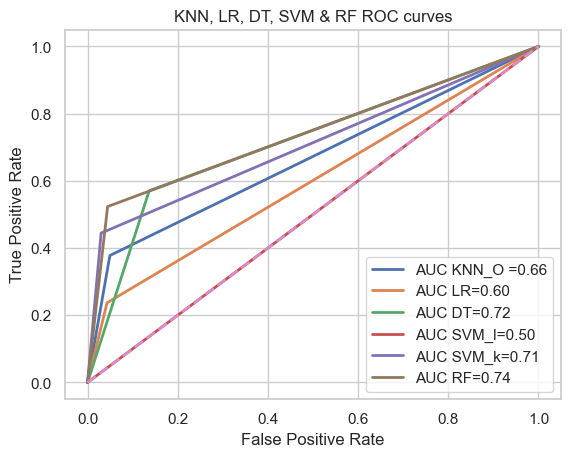

In [103]:
from sklearn import metrics
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_knn_o)
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_predictLR)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_dt)
fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_predictSVM_l)
fpr5,tpr5,thr5 = metrics.roc_curve(y_test,y_predictSVM_k)
fpr6,tpr6,thr6 = metrics.roc_curve(y_test,y_pred_rf)
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
auc4 = metrics.auc(fpr4,tpr4)
auc5 = metrics.auc(fpr5,tpr5)
auc6 = metrics.auc(fpr6,tpr6)
plt.plot(fpr,tpr,'-',lw=2,label='AUC KNN_O =%.2f'%auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='AUC LR=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='AUC DT=%.2f'%auc3)
plt.plot(fpr4,tpr4,'-',lw=2,label='AUC SVM_l=%.2f'%auc4)
plt.plot(fpr5,tpr5,'-',lw=2,label='AUC SVM_k=%.2f'%auc5)
plt.plot(fpr6,tpr6,'-',lw=2,label='AUC RF=%.2f'%auc6)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN, LR, DT, SVM & RF ROC curves')
plt.legend(loc='lower right')
plt.show()